In [19]:
# Install TensorFlow (if needed)
!pip install tensorflow

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import PIL
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

In [21]:
# Check TensorFlow version
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.17.1


In [22]:
# Check GPU availability
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [28]:
# Mount Google Drive if data is stored there
print(os.listdir("/content/drive/MyDrive/"))
from google.colab import drive
drive.mount('/content/drive')

['Colab Notebooks', 'archive']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
!ls "/content/drive/MyDrive/archive/training"


train_fire  train-smoke


In [31]:
# Set dataset paths (Modify based on your dataset location)
dataset_path = '/content/drive/MyDrive/archive/training'


In [32]:
# Data Augmentation
batch_size = 16
training_datagenarator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1
)


In [36]:
# Load Training and Validation Data
train = training_datagenarator.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=batch_size,
    subset='training'
)

validation = training_datagenarator.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=batch_size,
    subset='validation'
)

Found 5775 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [37]:
# Building CNN Model
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


In [38]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,857,473 (98.64 MB)

 Trainable params: 25,857,473 (98.64 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:

# Compile Model
cnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
# Define Checkpoint
checkpoint_path = '/content/drive/MyDrive/archive/models/fire_and_smoke_model.keras'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor='val_loss', mode="min", save_best_only=True
)

In [42]:
# Train the Model
cnn.fit(
    train,
    validation_data=validation,
    epochs=1,
    steps_per_epoch=train.samples // batch_size,
    validation_steps=validation.samples // batch_size,
    callbacks=[checkpoint]
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


360/360 ━━━━━━━━━━━━━━━━━━━━ 2702s 7s/step - accuracy: 0.9367 - loss: 0.2230 - val_accuracy: 0.9891 - val_loss: 0.0205


In [43]:
# Load the Best Model
cnn = load_model(checkpoint_path)
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,572,421 (295.92 MB)

 Trainable params: 25,857,473 (98.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,714,948 (197.28 MB)

In [44]:
# Testing the Model
test_image_path = '/content/drive/MyDrive/archive/test_big/000001.jpg'

In [45]:
# Load and Preprocess Test Image
test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image = image.img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)

In [46]:
# Predict the Class
result = cnn.predict(test_image)
prediction = 'Fire' if result[0][0] > 0.5 else 'Smoke'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step


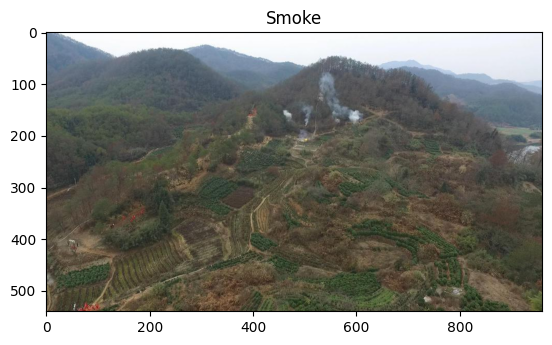

In [47]:
# Display Image with Prediction
image_show = PIL.Image.open(test_image_path)
plt.imshow(image_show)
plt.title(prediction)
plt.show()

In [79]:
# Testing the Model
test_image_path = '/content/drive/MyDrive/archive/training/train_fire/6.png'

In [80]:
# Load and Preprocess Test Image
test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image = image.img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)

In [81]:
# Predict the Class
result = cnn.predict(test_image)
prediction = 'Fire' if result[0][0] > 0.5 else 'Smoke'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


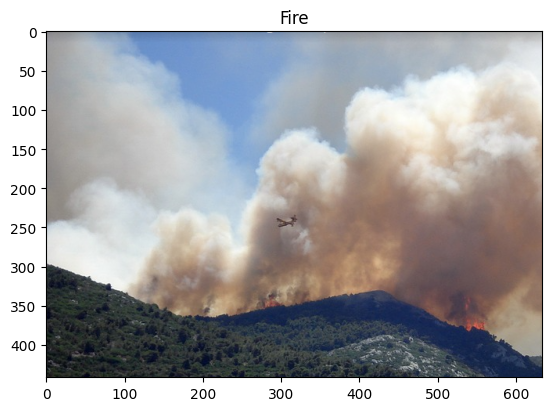

In [82]:
# Display Image with Prediction
image_show = PIL.Image.open(test_image_path)
plt.imshow(image_show)
plt.title(prediction)
plt.show()